In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [13]:
# ========================================
#  MAPPING OFFICIEL (selon documentation)
# ========================================

SPECIES_MAPPING = {
    1: {"range": (1001, 1059), "scientific": "Phyllostachys edulis", "common": "pubescent bamboo"},
    2: {"range": (1060, 1122), "scientific": "Aesculus chinensis", "common": "Chinese horse chestnut"},
    3: {"range": (1552, 1616), "scientific": "Berberis anhweiensis", "common": "Anhui Barberry"},
    4: {"range": (1123, 1194), "scientific": "Cercis chinensis", "common": "Chinese redbud"},
    5: {"range": (1195, 1267), "scientific": "Indigofera tinctoria", "common": "true indigo"},
    6: {"range": (1268, 1323), "scientific": "Acer Palmatum", "common": "Japanese maple"},
    7: {"range": (1324, 1385), "scientific": "Phoebe nanmu", "common": "Nanmu"},
    8: {"range": (1386, 1437), "scientific": "Kalopanax septemlobus", "common": "castor aralia"},
    9: {"range": (1497, 1551), "scientific": "Cinnamomum japonicum", "common": "Chinese cinnamon"},
    10: {"range": (1438, 1496), "scientific": "Koelreuteria paniculata", "common": "goldenrain tree"},
    11: {"range": (2001, 2050), "scientific": "Ilex macrocarpa", "common": "Big-fruited Holly"},
    12: {"range": (2051, 2113), "scientific": "Pittosporum tobira", "common": "Japanese cheesewood"},
    13: {"range": (2114, 2165), "scientific": "Chimonanthus praecox", "common": "wintersweet"},
    14: {"range": (2166, 2230), "scientific": "Cinnamomum camphora", "common": "camphortree"},
    15: {"range": (2231, 2290), "scientific": "Viburnum awabuki", "common": "Japan Arrowwood"},
    16: {"range": (2291, 2346), "scientific": "Osmanthus fragrans", "common": "sweet osmanthus"},
    17: {"range": (2347, 2423), "scientific": "Cedrus deodara", "common": "deodar"},
    18: {"range": (2424, 2485), "scientific": "Ginkgo biloba", "common": "ginkgo, maidenhair tree"},
    19: {"range": (2486, 2546), "scientific": "Lagerstroemia indica", "common": "Crape myrtle"},
    20: {"range": (2547, 2612), "scientific": "Nerium oleander", "common": "oleander"},
    21: {"range": (2616, 2675), "scientific": "Podocarpus macrophyllus", "common": "yew plum pine"},
    22: {"range": (3001, 3055), "scientific": "Prunus serrulata", "common": "Japanese Flowering Cherry"},
    23: {"range": (3056, 3110), "scientific": "Ligustrum lucidum", "common": "Glossy Privet"},
    24: {"range": (3111, 3175), "scientific": "Tonna sinensis", "common": "Chinese Toon"},
    25: {"range": (3176, 3229), "scientific": "Prunus persica", "common": "peach"},
    26: {"range": (3230, 3281), "scientific": "Manglietia fordiana", "common": "Ford Woodlotus"},
    27: {"range": (3282, 3334), "scientific": "Acer buergerianum", "common": "trident maple"},
    28: {"range": (3335, 3389), "scientific": "Mahonia bealei", "common": "Beale's barberry"},
    29: {"range": (3390, 3446), "scientific": "Magnolia grandiflora", "common": "southern magnolia"},
    30: {"range": (3447, 3510), "scientific": "Populus ×canadensis", "common": "Canadian poplar"},
    31: {"range": (3511, 3563), "scientific": "Liriodendron chinense", "common": "Chinese tulip tree"},
    32: {"range": (3566, 3621), "scientific": "Citrus reticulata", "common": "tangerine"},
}

print(f"\n Nombre d'espèces dans le mapping: {len(SPECIES_MAPPING)}")


 Nombre d'espèces dans le mapping: 32


In [14]:
# ========================================
# FONCTION POUR TROUVER LE LABEL
# ========================================

def get_species_label(filename):
    """
    Retourne le label de l'espèce basé sur le nom du fichier.
    
    Exemple:
        "1001.jpg" → Label 1 (Phyllostachys edulis)
        "1060.jpg" → Label 2 (Aesculus chinensis)
        "3511.jpg" → Label 32 (Liriodendron chinense)
    """
    # Extraire le numéro (sans .jpg)
    file_num = int(filename.replace('.jpg', ''))
    
    # Trouver dans quel range il se trouve
    for label, info in SPECIES_MAPPING.items():
        start, end = info['range']
        if start <= file_num <= end:
            return label
    
    # Si non trouvé (erreur)
    print(f"Fichier {filename} non mappé !")
    return None

In [15]:
data_dir = '../data/raw/Leaves/'
image_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.jpg')])

In [16]:
print(f" Nombre total d'images: {len(image_files)}")
print(f" Premières images: {image_files[:5]}")
print(f" Dernières images: {image_files[-5:]}")

 Nombre total d'images: 1907
 Premières images: ['1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg']
 Dernières images: ['3617.jpg', '3618.jpg', '3619.jpg', '3620.jpg', '3621.jpg']


In [17]:
# ========================================
# ANALYSER LA DISTRIBUTION
# ========================================
distribution = defaultdict(int)
image_to_label = {}

for img_file in image_files:
    label = get_species_label(img_file)
    if label:
        distribution[label] += 1
        image_to_label[img_file] = label

# Créer DataFrame
df_dist = pd.DataFrame([
    {
        'Label': label,
        'Count': count,
        'Scientific Name': SPECIES_MAPPING[label]['scientific'],
        'Common Name': SPECIES_MAPPING[label]['common']
    }
    for label, count in sorted(distribution.items())
], columns=['Label', 'Count', 'Scientific Name', 'Common Name'])

print("\n" + "=" * 60)
print("DISTRIBUTION DES IMAGES PAR ESPÈCE")
print("=" * 60)
print(df_dist)



DISTRIBUTION DES IMAGES PAR ESPÈCE
    Label  Count          Scientific Name                Common Name
0       1     59     Phyllostachys edulis           pubescent bamboo
1       2     63       Aesculus chinensis     Chinese horse chestnut
2       3     65     Berberis anhweiensis             Anhui Barberry
3       4     72         Cercis chinensis             Chinese redbud
4       5     73     Indigofera tinctoria                true indigo
5       6     56            Acer Palmatum             Japanese maple
6       7     62             Phoebe nanmu                      Nanmu
7       8     52    Kalopanax septemlobus              castor aralia
8       9     55     Cinnamomum japonicum           Chinese cinnamon
9      10     59  Koelreuteria paniculata            goldenrain tree
10     11     50          Ilex macrocarpa          Big-fruited Holly
11     12     63       Pittosporum tobira        Japanese cheesewood
12     13     52     Chimonanthus praecox                winterswee

In [18]:
print("\n📊 Statistiques:")
print(df_dist['Count'].describe())


📊 Statistiques:
count    32.000000
mean     59.593750
std       6.564122
min      50.000000
25%      55.000000
50%      59.000000
75%      63.250000
max      77.000000
Name: Count, dtype: float64


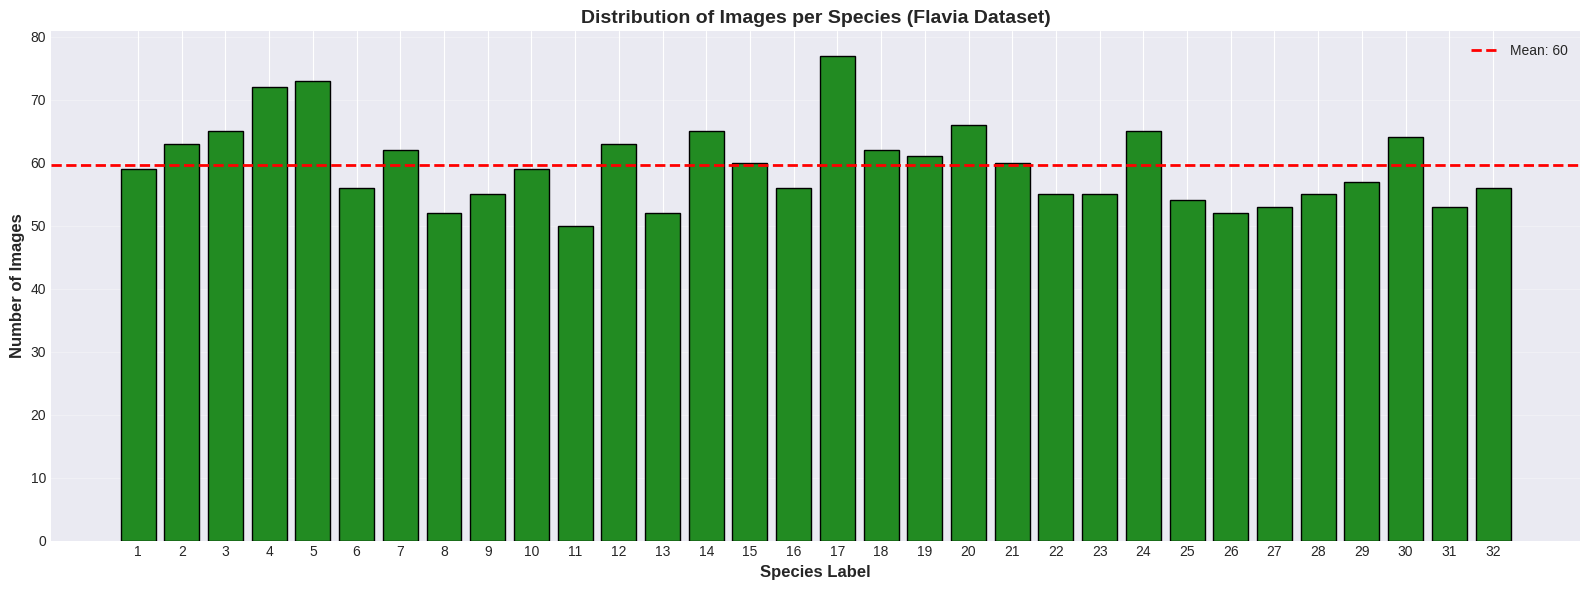

In [19]:
# ========================================
# VISUALISER LA DISTRIBUTION
# ========================================

plt.figure(figsize=(16, 6))
plt.bar(df_dist['Label'], df_dist['Count'], color='forestgreen', edgecolor='black')
plt.xlabel('Species Label', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Distribution of Images per Species (Flavia Dataset)', fontsize=14, fontweight='bold')
plt.xticks(df_dist['Label'])
plt.grid(axis='y', alpha=0.3)

# Ajouter ligne moyenne
mean_count = df_dist['Count'].mean()
plt.axhline(mean_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_count:.0f}')
plt.legend()

plt.tight_layout()
plt.savefig('../data/processed/distribution.png', dpi=300)
plt.show()

In [20]:
# ========================================
# VÉRIFIER DÉSÉQUILIBRE
# ========================================

print("\n" + "=" * 60)
print("ANALYSE DU DÉSÉQUILIBRE DES CLASSES")
print("=" * 60)

min_count = df_dist['Count'].min()
max_count = df_dist['Count'].max()
imbalance_ratio = max_count / min_count

print(f"Espèce avec le MOINS d'images: {df_dist.loc[df_dist['Count'].idxmin()]['Scientific Name']} ({min_count} images)")
print(f"Espèce avec le PLUS d'images: {df_dist.loc[df_dist['Count'].idxmax()]['Scientific Name']} ({max_count} images)")
print(f"Ratio déséquilibre: {imbalance_ratio:.2f}x")

if imbalance_ratio < 1.5:
    print("✅ Dataset bien équilibré (ratio < 1.5)")
elif imbalance_ratio < 3:
    print("🟡 Léger déséquilibre (1.5 < ratio < 3)")
else:
    print("🔴 Déséquilibre important (ratio > 3) → Utiliser class_weight ou SMOTE")



ANALYSE DU DÉSÉQUILIBRE DES CLASSES
Espèce avec le MOINS d'images: Ilex macrocarpa (50 images)
Espèce avec le PLUS d'images: Cedrus deodara (77 images)
Ratio déséquilibre: 1.54x
🟡 Léger déséquilibre (1.5 < ratio < 3)



VISUALISATION D'ÉCHANTILLONS


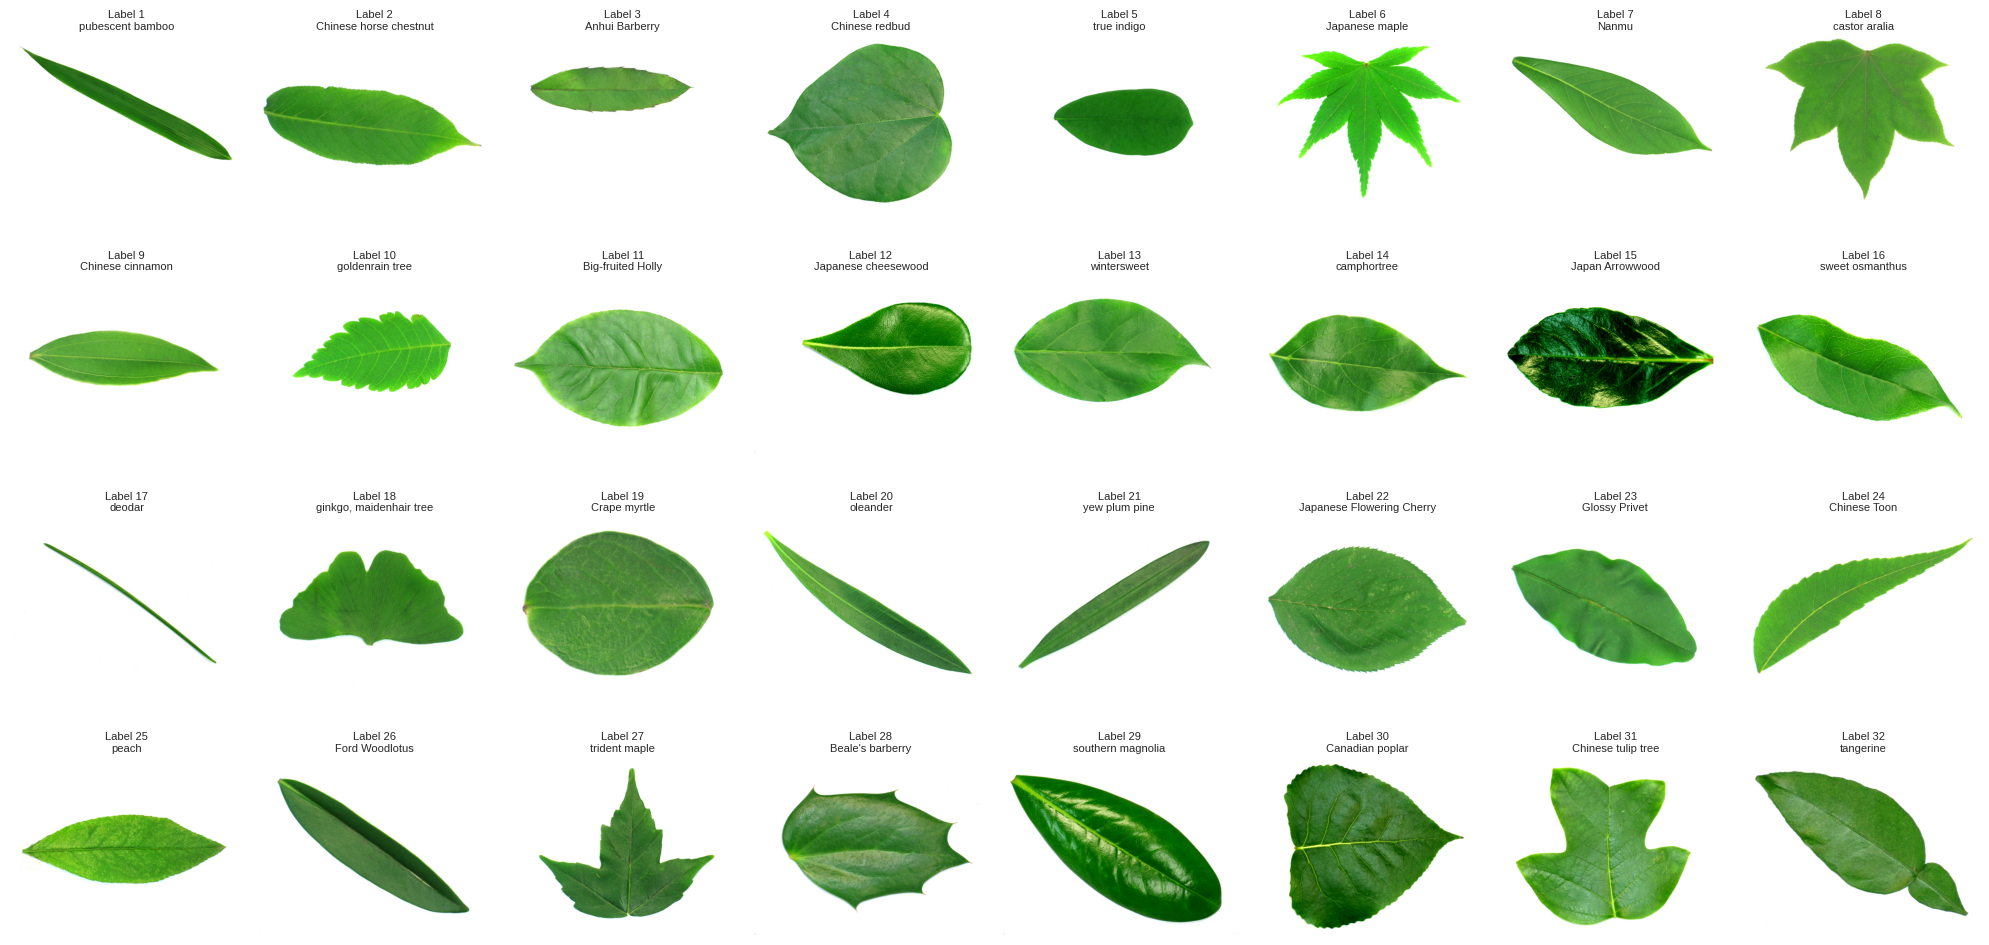

In [ ]:
# ========================================
#  AFFICHER ÉCHANTILLONS
# ========================================

print("\n" + "=" * 60)
print("VISUALISATION D'ÉCHANTILLONS")
print("=" * 60)

# Sélectionner 1 image par espèce
sample_images = []
for label in sorted(distribution.keys()):
    # Trouver la première image de cette espèce
    for img_file, img_label in image_to_label.items():
        if img_label == label:
            sample_images.append((label, img_file))
            break

# Afficher 32 images (ou 33)
n_species = len(sample_images)
n_cols = 8
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 2.5))
axes = axes.flatten()

for i, (label, img_file) in enumerate(sample_images):
    img_path = os.path.join(data_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img)
    axes[i].set_title(f"Label {label}\n{SPECIES_MAPPING[label]['common']}", fontsize=8)
    axes[i].axis('off')

# Cacher les axes vides
for i in range(len(sample_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('../data/processed/species_samples.png', dpi=300, bbox_inches='tight')
plt.show()


ANALYSE DES TAILLES D'IMAGES
       Height   Width  Aspect_Ratio
count   200.0   200.0  2.000000e+02
mean   1200.0  1600.0  1.333333e+00
std       0.0     0.0  2.226018e-16
min    1200.0  1600.0  1.333333e+00
25%    1200.0  1600.0  1.333333e+00
50%    1200.0  1600.0  1.333333e+00
75%    1200.0  1600.0  1.333333e+00
max    1200.0  1600.0  1.333333e+00


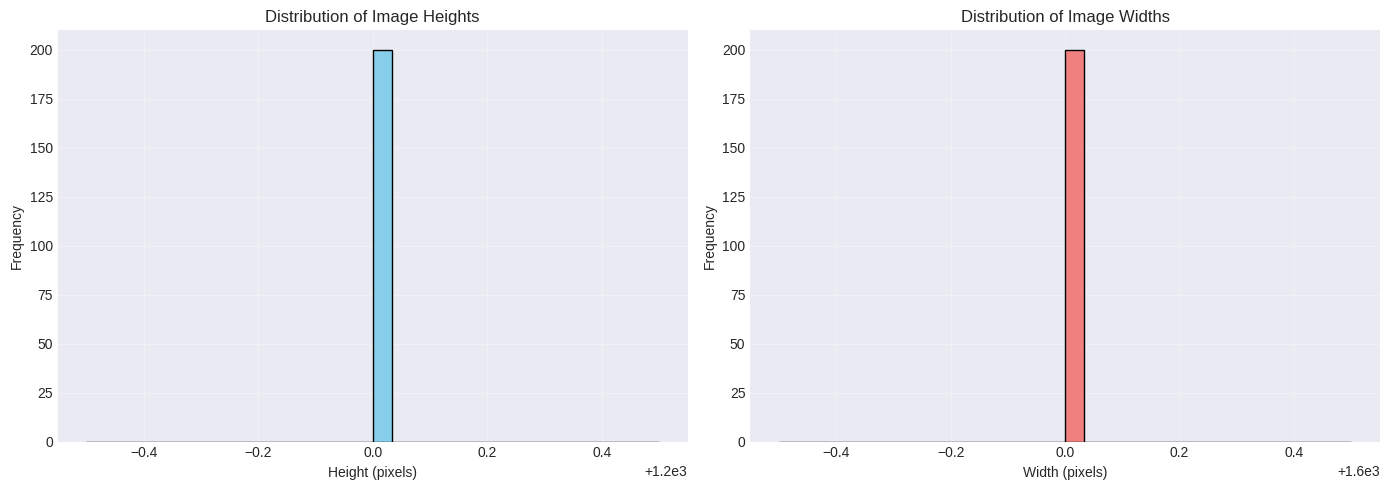

In [23]:
# ========================================
# ANALYSER TAILLES D'IMAGES
# ========================================

print("\n" + "=" * 60)
print("ANALYSE DES TAILLES D'IMAGES")
print("=" * 60)

sizes = []
for img_file in image_files[:200]:  # Sample de 200 images pour rapidité
    img = cv2.imread(os.path.join(data_dir, img_file))
    h, w = img.shape[:2]
    sizes.append({'Height': h, 'Width': w, 'Aspect_Ratio': w/h})

df_sizes = pd.DataFrame(sizes)
print(df_sizes.describe())

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des hauteurs
axes[0].hist(df_sizes['Height'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Height (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Image Heights')
axes[0].grid(alpha=0.3)

# Histogramme des largeurs
axes[1].hist(df_sizes['Width'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Width (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Image Widths')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/image_sizes.png', dpi=300)
plt.show()

In [24]:
# ========================================
# SAUVEGARDER LE MAPPING
# ========================================

# Sauvegarder distribution en CSV
df_dist.to_csv('../data/processed/species_distribution.csv', index=False)
print(f"\n✅ Distribution sauvegardée: ../data/processed/species_distribution.csv")

# Sauvegarder mapping image → label
df_mapping = pd.DataFrame([
    {'filename': img, 'label': label}
    for img, label in sorted(image_to_label.items())
])
df_mapping.to_csv('../data/processed/image_labels.csv', index=False)
print(f"✅ Mapping sauvegardé: ../data/processed/image_labels.csv")

print("\n" + "=" * 60)
print("✅ EDA TERMINÉE !")
print("=" * 60)


✅ Distribution sauvegardée: ../data/processed/species_distribution.csv
✅ Mapping sauvegardé: ../data/processed/image_labels.csv

✅ EDA TERMINÉE !


###  Dataset très bien équilibré !
* Toutes les classes ont entre 50-77 images
* Écart-type faible (6.5) = homogène
* Taille homogène = pas de distorsion lors du resize(TOUTES les images: 1600 x 1200 pixels; Aspect ratio: 4:3)
* Haute résolution = beaucoup de détails pour features
* Aspect ratio constant = facilite data augmentation